```
Student-1
Name: Md Tarek Mahmud
ID# 21-44979-2
```

```
Student-2
Name: A.F. Faizur Rahman
ID# 21-44936-2
```




*   Mount your google drive.



In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive




*   Import all necessary libraries.



In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn import metrics
import math
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

•	**Task 1:** Read/Load the dataset file in your program. Use Pandas library to complete this task.

In [5]:
np.random.seed(123)
df = pd.read_csv('/content/drive/My Drive/loan_data.csv')
df = shuffle(df)
print(df)

      person_age person_gender person_education  person_income  \
2648        23.0          male           Master        67983.0   
2456        22.0          male        Associate        50649.0   
4557        29.0        female      High School        41751.0   
4884        23.0        female           Master        73240.0   
92          28.0          male         Bachelor       121835.0   
...          ...           ...              ...            ...   
1593        33.0        female         Bachelor        66846.0   
4060        27.0        female         Bachelor        26855.0   
1346        27.0          male         Bachelor        55920.0   
3454        30.0          male           Master       106537.0   
3582        24.0          male           Master        14710.0   

      person_emp_exp person_home_ownership  loan_amnt      loan_intent  \
2648               2                  RENT    10000.0         PERSONAL   
2456               1                  RENT     4800.0      

•	**Task 2:** Apply appropriate data cleaning techniques to the dataset. In this step, replace bad data using proper methods and do not delete any record except duplicate records. Use Pandas library to complete this task.

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2648 to 3582
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      5000 non-null   float64
 1   person_gender                   5000 non-null   object 
 2   person_education                5000 non-null   object 
 3   person_income                   5000 non-null   float64
 4   person_emp_exp                  5000 non-null   int64  
 5   person_home_ownership           5000 non-null   object 
 6   loan_amnt                       5000 non-null   float64
 7   loan_intent                     5000 non-null   object 
 8   loan_int_rate                   5000 non-null   float64
 9   loan_percent_income             5000 non-null   float64
 10  cb_person_cred_hist_length      5000 non-null   float64
 11  credit_score                    5000 non-null   int64  
 12  previous_loan_defaults_on_file  5000

In [7]:
df.drop_duplicates(inplace = True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2648 to 3582
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      5000 non-null   float64
 1   person_gender                   5000 non-null   object 
 2   person_education                5000 non-null   object 
 3   person_income                   5000 non-null   float64
 4   person_emp_exp                  5000 non-null   int64  
 5   person_home_ownership           5000 non-null   object 
 6   loan_amnt                       5000 non-null   float64
 7   loan_intent                     5000 non-null   object 
 8   loan_int_rate                   5000 non-null   float64
 9   loan_percent_income             5000 non-null   float64
 10  cb_person_cred_hist_length      5000 non-null   float64
 11  credit_score                    5000 non-null   int64  
 12  previous_loan_defaults_on_file  5000

•	**Task 3:** Draw graphs to analyze the frequency distributions of the features. Use Matplotlib library to complete this task. Draw all the plots in a single figure so that all plots can be seen in one diagram (use subplot() function).

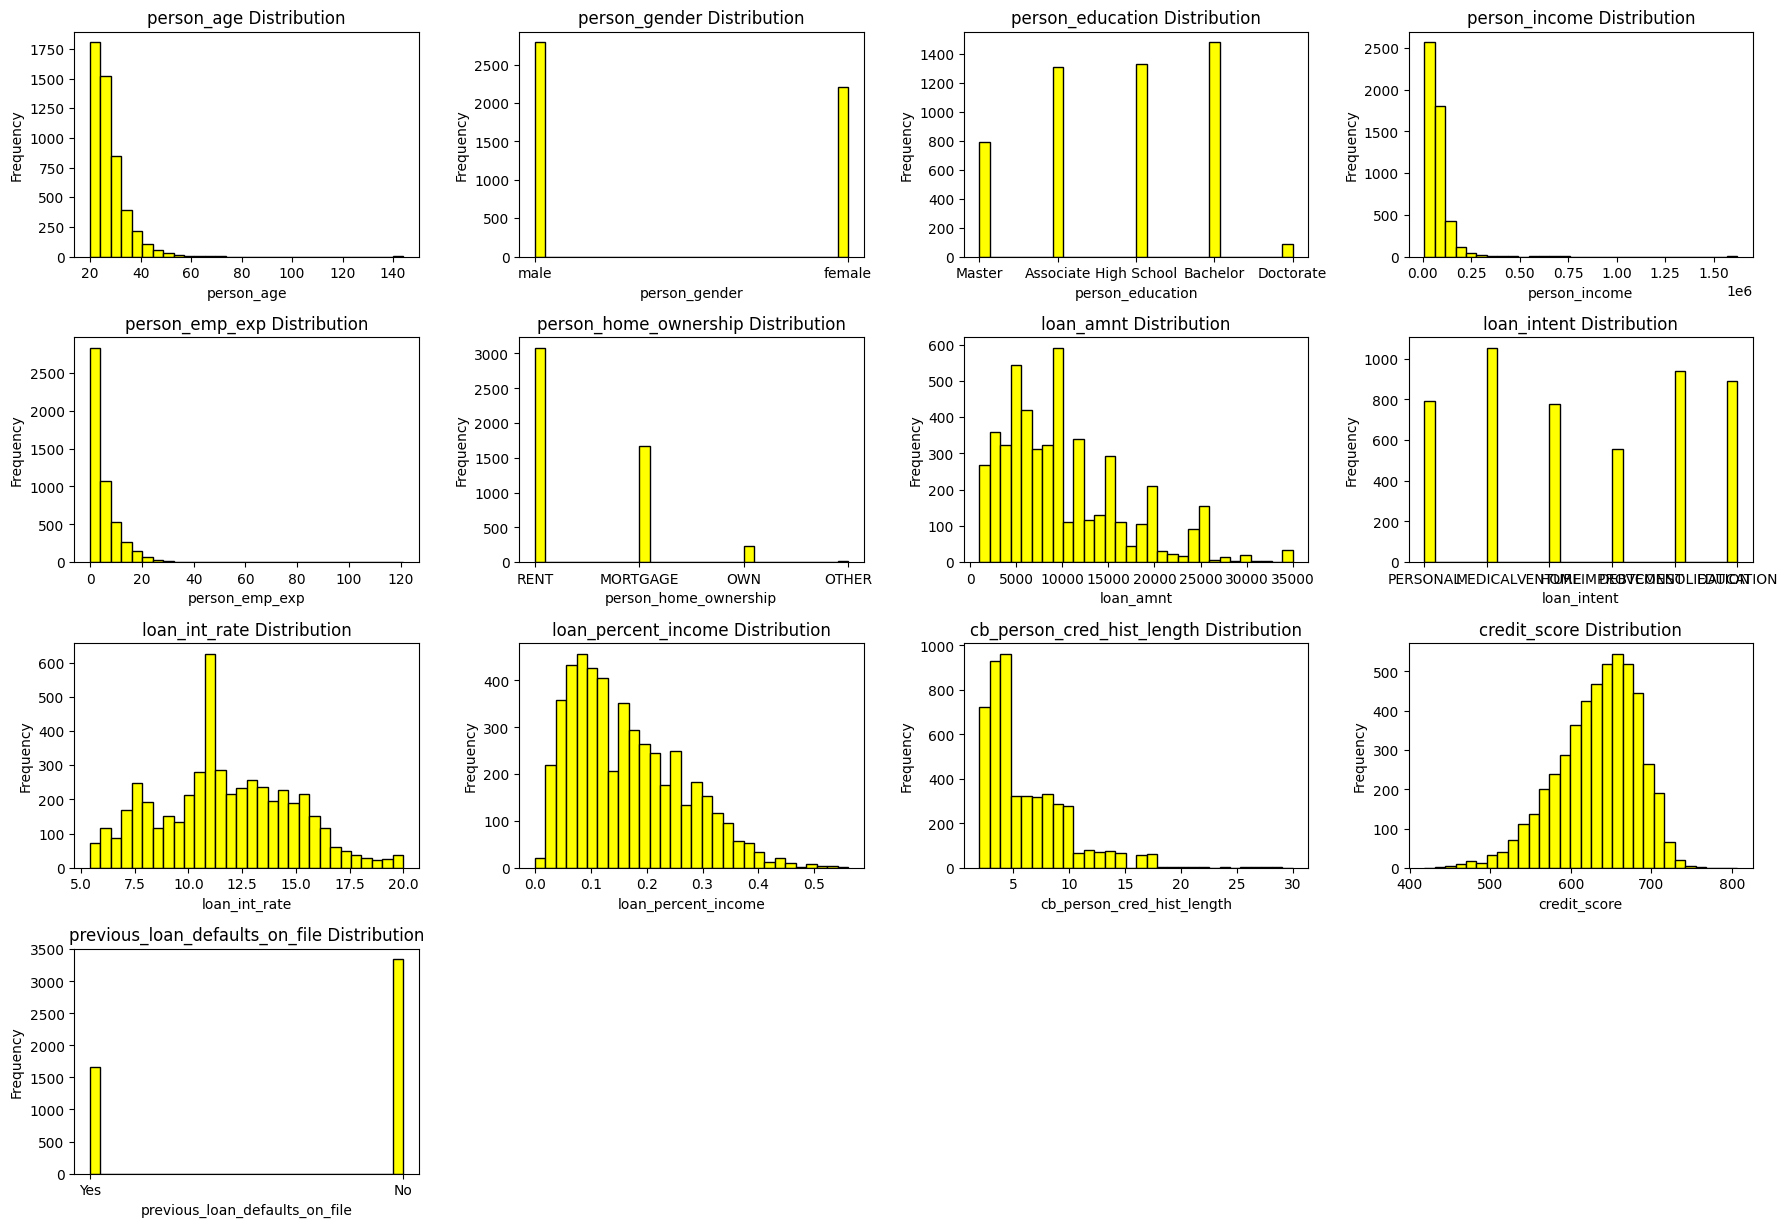

In [8]:
feature_columns = ['person_age', 'person_gender', 'person_education', 'person_income','person_emp_exp','person_home_ownership','loan_amnt','loan_intent','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score','previous_loan_defaults_on_file']


plt.figure(figsize=(18, 15))
for i, column in enumerate(feature_columns, 1):
    plt.subplot(5, 4, i)
    plt.hist(df[column], bins=30, color='yellow', edgecolor='black')
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


•	**Task 4:** Perform scaling to the features of the dataset. Remember that you will need to apply data conversion before performing scaling whenever necessary.

In [9]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = [
    'person_gender', 'person_education', 'person_home_ownership',
    'loan_intent', 'previous_loan_defaults_on_file'
]

encoded_values = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    encoded_values[column] = {category: code for code, category in enumerate(le.classes_)}

for column, mapping in encoded_values.items():
    print(f'{column}: {mapping}')

print(df.head())


person_gender: {'female': 0, 'male': 1}
person_education: {'Associate': 0, 'Bachelor': 1, 'Doctorate': 2, 'High School': 3, 'Master': 4}
person_home_ownership: {'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}
loan_intent: {'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}
previous_loan_defaults_on_file: {'No': 0, 'Yes': 1}
      person_age  person_gender  person_education  person_income  \
2648        23.0              1                 4        67983.0   
2456        22.0              1                 0        50649.0   
4557        29.0              0                 3        41751.0   
4884        23.0              0                 4        73240.0   
92          28.0              1                 1       121835.0   

      person_emp_exp  person_home_ownership  loan_amnt  loan_intent  \
2648               2                      3    10000.0            4   
2456               1                      3     4800.0            3  

In [10]:
x = df[feature_columns]
y = df['loan_status']

print(x.shape)
print(y.shape)

(5000, 13)
(5000,)


•	**Task 5:** Split your data into two parts: Training dataset and Testing dataset. You must use the function train_test_split() to complete this task and use value 3241 as the value of the random_state parameter of this function.

In [11]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3241)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(4000, 13)
(1000, 13)
(4000,)
(1000,)


•	**Task 6:** Apply Support Vector Machine (SVM) Classifier to the dataset. Build (train) your prediction model in this step.

In [23]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(x_train, y_train)

y_pred_train = svm_classifier.predict(x_train)
y_pred_test = svm_classifier.predict(x_test)


•	**Task 7:** Calculate the confusion matrix for your model. Interpret it in detail in the report.

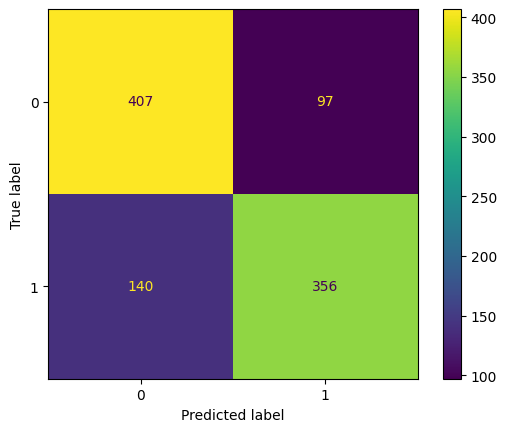

In [24]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

•	**Taks 8:** Calculate the train and test accuracy of your model and compare them.

In [25]:
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'Testing Accuracy: {test_accuracy:.4f}')

Training Accuracy: 0.7642
Testing Accuracy: 0.7630
